In [ ]:
# https://github.com/jukyellow/algoTrade/blob/master/ch03/3.1%20buy%20and%20hold_backtesting.ipynb

In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('AMZN.csv',index_col='Date', parse_dates=['Date']) # 아마존 주식
print(df.head())
print()
print(df[df.isin([np.nan, np.inf, -np.inf]).any(1)])

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


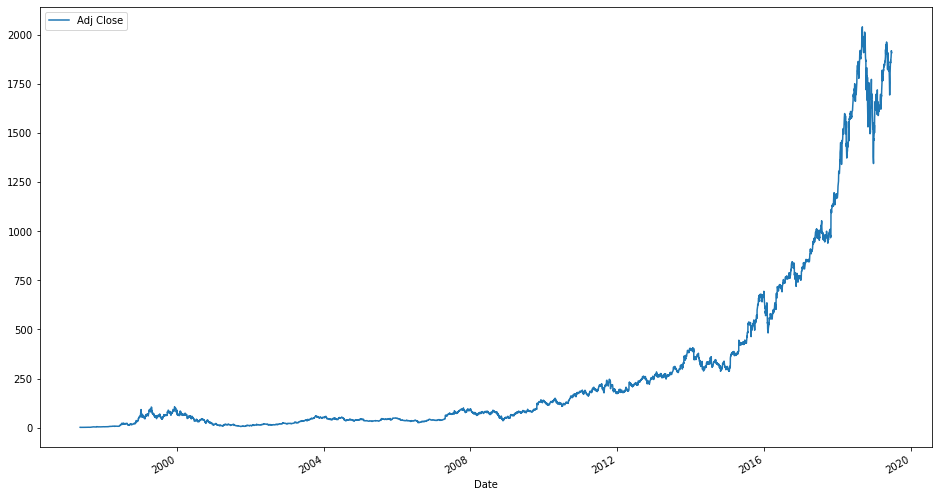

In [10]:
price_df = df.loc[:,['Adj Close']].copy()
price_df.plot(figsize=(16,9))

            Adj Close
Date                 
1997-05-15   1.958333
1997-05-16   1.729167
1997-05-19   1.708333
1997-05-20   1.635417
1997-05-21   1.427083


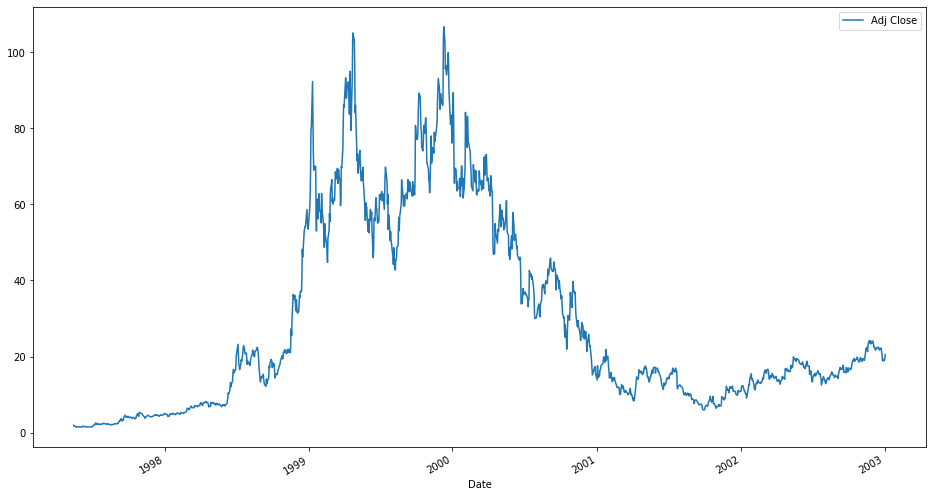

In [11]:
from_date = '1997-01-03'
to_date = '2003-01-03'
print(price_df.loc[from_date:to_date].head())
price_df.loc[from_date:to_date].plot(figsize=(16,9))

In [13]:
#일별 수익률
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()
price_df.head(10)

,Adj Close,daily_rtn
Date,,
1997-05-15,1.958333,NaN
1997-05-16,1.729167,-0.117021
1997-05-19,1.708333,-0.012049
1997-05-20,1.635417,-0.042683
1997-05-21,1.427083,-0.127389
1997-05-22,1.395833,-0.021898
1997-05-23,1.500000,0.074627
1997-05-27,1.583333,0.055555
1997-05-28,1.531250,-0.032895


            Adj Close  daily_rtn    st_rtn
Date                                      
1997-05-15   1.958333        NaN       NaN
1997-05-16   1.729167  -0.117021  0.882979
1997-05-19   1.708333  -0.012049  0.872340
1997-05-20   1.635417  -0.042683  0.835107
1997-05-21   1.427083  -0.127389  0.728723
AxesSubplot(0.125,0.2;0.775x0.68)


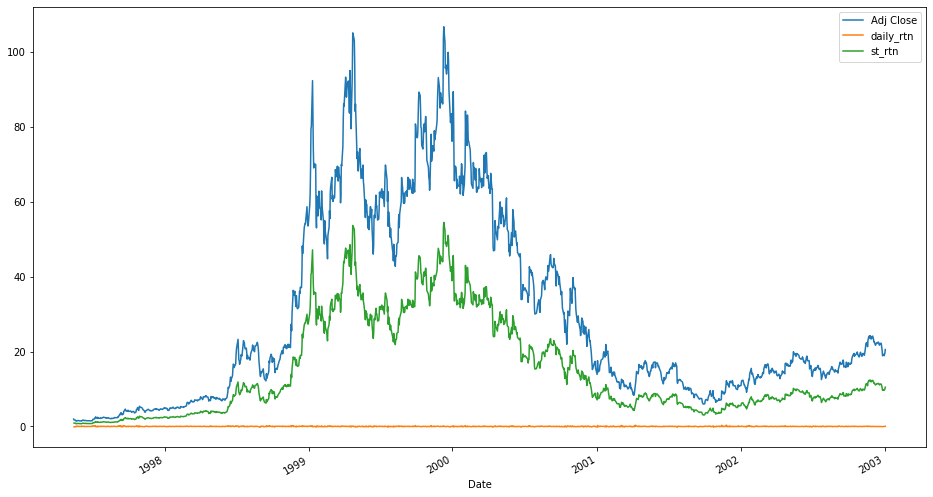

In [17]:
#바이앤드홀드 전략의 누적곱
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
print(price_df.head())
print(price_df.loc[from_date:to_date].plot(figsize=(16,9)))

In [19]:
first_date = price_df.index[0]
last_date = price_df.index[-1]
print('first_date:',first_date, ' ,last_date:', last_date)

first_date = price_df.index[0]
print(price_df.loc[last_date,'Adj Close'])
print(price_df.loc[first_date,'Adj Close'])
print((price_df.loc[last_date,'Adj Close'] / price_df.loc[first_date,'Adj Close'] ))

first_date: 1997-05-15 00:00:00  ,last_date: 2019-06-24 00:00:00
1907.953857
1.958333
974.2744757914


              Adj Close  daily_rtn      st_rtn
Date                                          
2019-06-18  1901.369995   0.008133  970.912503
2019-06-19  1908.790039   0.003902  974.701462
2019-06-20  1918.189941   0.004925  979.501413
2019-06-21  1911.300049  -0.003592  975.983170
2019-06-24  1907.953857  -0.001751  974.274476
누적 수익 :  974.2744757914112


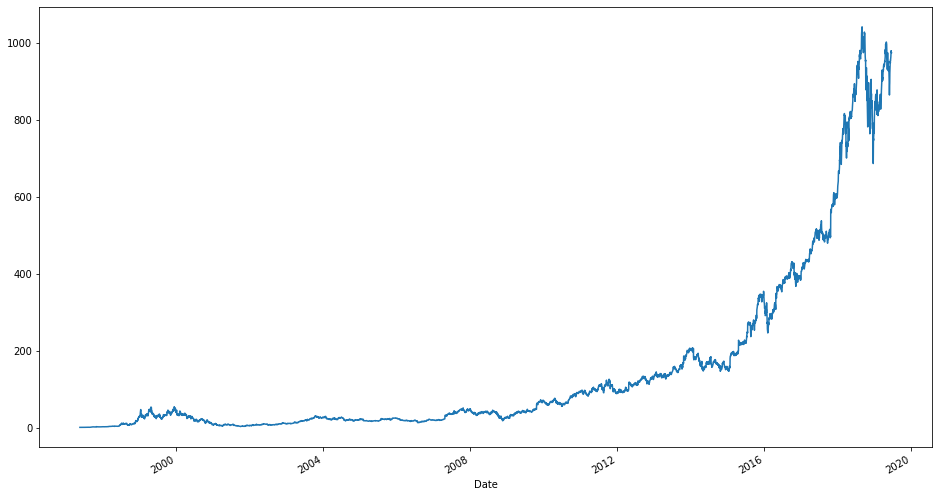

In [21]:
print(price_df.tail())
last_date = price_df.index[-1]
print('누적 수익 : ',price_df.loc[last_date,'st_rtn'])
price_df['st_rtn'].plot(figsize=(16,9))

누적 수익 :  10.356931096748838


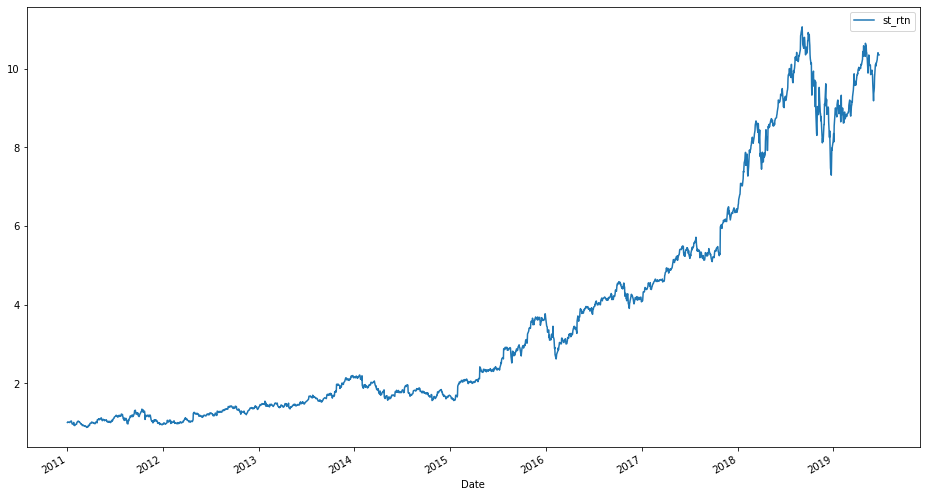

In [22]:
base_date = '2011-01-03'
tmp_df = price_df.loc[base_date:,['st_rtn']] / price_df.loc[base_date ,['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익 : ',tmp_df.loc[last_date,'st_rtn'])
tmp_df.plot(figsize=(16,9))

In [ ]:
# 백테스팅

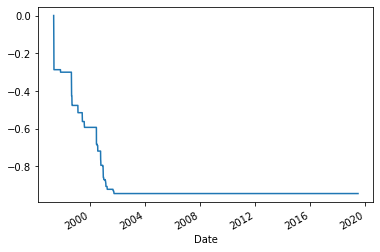

In [23]:
# 최대낙폭(MDD)
historical_max = price_df['Adj Close'].cummax() #누적 최대값
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0 # 현재 종가에서 누적 초댓값 대비 낙폭률 계산
historical_dd = daily_drawdown.cummin() # 최대 하락률
historical_dd.plot() # 최대 하락률 추세

In [24]:
#연 평균 복리 수익률
CAGR = price_df.loc['2019-06-24','st_rtn'] ** (252./len(price_df.index)) -1

#샤프지수(1이상이 좋은것)
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)

#변동성
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)

#최대낙폭
MDD = historical_dd.min()

In [26]:
print('CAGR : ',round(CAGR*100,2),'%')  # 2019/6/24까지 연 복리 수익률
print('Sharpe : ',round(Sharpe,2))      # 1이상이면 좋다고 판단
print('VOL : ',round(VOL*100,2),'%')    # 수익률이 꽤 출렁였음
print('MDD : ',round(-1*MDD*100,2),'%') # 2000년 초반 IT 거품빠지면서 90%낙폭 경험

CAGR :  36.58 %
Sharpe :  0.81
VOL :  60.09 %
MDD :  94.4 %
